# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of Churn**

- **Revenue-based churn:** Customers who have not utilized any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.


- **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- **High Value Churn:** In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Business Objective**

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

# Segment - I: Data Understanding

## Importing the libraries and reading the dataset

In [1]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

#from sklearn.model_selection import train_test_split

# Using sklearn library and importing StandardScaler function for feature scaling

#from sklearn.preprocessing import StandardScaler

# Using sklearn library and importing RFE and LogisticRegression

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

# Importing statsmodel library

#import statsmodels.api as sm

# Using statsmodel library and importing variance inflation factor (VIF) function for calculating VIF.

#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using sklearn library and importing metrics function for using various metrics available to evalaute the model.

#from sklearn import metrics

# Using sklearn library and importing various metrics to evaluate the model.

#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Using sklearn library and importing precison recall curve to find optimal cutoff.

#from sklearn.metrics import precision_recall_curve

In [2]:
# Reading the dataset

telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Printing the first five rows of the dataframe 'telecom'

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Data Inspection

### Basic Structure Checking

In [4]:
# Checking the shape of dataframe

telecom.shape

(99999, 226)

**There are 99999 rows and 226 columns initially.**

In [5]:
# Finding the basic statistics for numerical variables

telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Checking missing values and duplicated rows

In [6]:
# Calculating the missing values in each column of the dataframe

telecom.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [7]:
# Calculating the percentage of missing values in each column

round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [8]:
# Checking for duplicated rows

telecom.duplicated().sum()

0

In [9]:
# Comparing the shapes of orginal dataframe before and after dropping the duplicates.

telecom.shape,telecom.drop_duplicates().shape

((99999, 226), (99999, 226))

***Observation:***

- There are no duplicated rows in this dataframe. The same is verified by checking the shape of the dataframe before and after dropping duplicates, if any.

- There is large no of columns with null value  more than 70% and its better to drop such columns as it will not help much for further analysis

## Data Cleaning

In [10]:
# Minutes of use total = mou of t2t + t2m + t2f + t2c so these cols can be deleted as users are not concenred on this

In [ ]:
cols_to_drop = ["loc_og_t2t_mou_6",
"loc_og_t2t_mou_7",
"loc_og_t2t_mou_8",
'loc_og_t2t_mou_9',
"loc_og_t2m_mou_6",
"loc_og_t2m_mou_7",
"loc_og_t2m_mou_8",
"loc_og_t2m_mou_9",
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
"loc_og_t2f_mou_9",
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
"loc_og_t2c_mou_9",
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
"std_og_t2f_mou_7",
"std_og_t2f_mou_8",
'std_og_t2f_mou_9',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
"std_og_t2c_mou_9",
'loc_ic_t2t_mou_6',
"loc_ic_t2t_mou_7",
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6',
"loc_ic_t2m_mou_7",
'loc_ic_t2m_mou_8',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
"std_ic_t2f_mou_8",
'std_ic_t2f_mou_9',
'std_ic_t2o_mou_6',
"std_ic_t2o_mou_7",
"std_ic_t2o_mou_8",
"std_ic_t2o_mou_9"
]

In [17]:
telecom.drop(cols_to_drop, axis=1, inplace = True)

In [18]:
# Other irrelevant cols to drop

cols_to_drop_2= ["mobile_number",
                 "circle_id",
"loc_og_t2o_mou",
"std_og_t2o_mou",
"loc_ic_t2o_mou",
"last_date_of_month_6",
"last_date_of_month_7",
"last_date_of_month_8",
"last_date_of_month_9"
    
]

In [20]:
telecom.drop(cols_to_drop_2, axis=1, inplace=True)

In [21]:
telecom.shape

(99999, 157)

In [22]:
# creating new columns for avg 6 & 7 as intro phase, 8 as use phase & 9 will be churn phase 

In [23]:
# Onnet + offNet use in intro and use phases

telecom["avg_net_mou_intro_phase"] = (telecom["onnet_mou_6"]+telecom["onnet_mou_7"]+
                                    telecom["offnet_mou_6"]+telecom["offnet_mou_7"])/2

In [24]:
telecom["avg_net_mou_use_phase"] = (telecom["onnet_mou_8"]+telecom["offnet_mou_8"])

In [26]:
telecom.drop(["onnet_mou_6","onnet_mou_7","offnet_mou_6","offnet_mou_7","onnet_mou_8","offnet_mou_8"], axis =1, inplace= True)

In [27]:
# roam avg in intro phase

telecom["avg_roam_IC_mou_intro_phase"] = (telecom["roam_ic_mou_6"]+telecom["roam_ic_mou_7"])/2

In [28]:
telecom["avg_roam_OG_mou_intro_phase"] = (telecom["roam_og_mou_6"]+telecom["roam_og_mou_7"])/2

In [31]:
telecom.rename(columns={'roam_ic_mou_8': 'roam_ic_mou_use_phase', 'roam_og_mou_8': 'roam_og_mou_use_phase'},inplace=True)

In [32]:
telecom.drop(["roam_ic_mou_6","roam_ic_mou_7","roam_og_mou_6","roam_og_mou_7"], axis =1, inplace=True)

In [33]:
# Outgoing calls  into intro (avg values) and use phase (rename)

# loc
telecom["avg_loc_og_mou_intro_phase"] = (telecom["loc_og_mou_6"]+telecom["loc_og_mou_7"])/2

# std
telecom["avg_std_og_mou_intro_phase"] = (telecom["std_og_mou_6"]+telecom["std_og_mou_7"])/2

# isd
telecom["avg_isd_og_mou_intro_phase"] = (telecom["isd_og_mou_6"]+telecom["isd_og_mou_7"])/2

# spl
telecom["avg_spl_og_mou_intro_phase"] = (telecom["spl_og_mou_6"]+telecom["spl_og_mou_7"])/2

# others
telecom["avg_og_others_intro_phase"] = (telecom["og_others_6"]+telecom["og_others_7"])/2

# total

telecom["avg_total_og_mou_intro_phase"] = (telecom["total_og_mou_6"]+telecom["total_og_mou_7"])/2



In [35]:
telecom.rename(columns = {'total_og_mou_8': 'total_og_mou_use_phase',
                'og_others_8': 'og_others_use_phase',
                'spl_og_mou_8': 'spl_og_mou_use_phase' ,
                'isd_og_mou_8': 'isd_og_mou_use_phase', 
                'std_og_mou_8': 'std_og_mou_use_phase', 
                'loc_og_mou_8': 'loc_og_mou_use_phase'}, inplace=True)

In [36]:
# Incoming calls  into intro (avg values) and use phase (rename)

# loc
telecom["avg_loc_ic_mou_intro_phase"] = (telecom["loc_ic_mou_6"]+telecom["loc_ic_mou_7"])/2

# std
telecom["avg_std_ic_mou_intro_phase"] = (telecom["std_ic_mou_6"]+telecom["std_ic_mou_7"])/2

# isd
telecom["avg_isd_ic_mou_intro_phase"] = (telecom["isd_ic_mou_6"]+telecom["isd_ic_mou_7"])/2

# spl
telecom["avg_spl_ic_mou_intro_phase"] = (telecom["spl_ic_mou_6"]+telecom["spl_ic_mou_7"])/2

# others
telecom["avg_ic_others_intro_phase"] = (telecom["ic_others_6"]+telecom["ic_others_7"])/2

# total

telecom["avg_total_ic_mou_intro_phase"] = (telecom["total_ic_mou_6"]+telecom["total_ic_mou_7"])/2



In [37]:
telecom.rename(columns={'total_ic_mou_8': 'total_ic_mou_use_phase',
                'ic_others_8': 'ic_others_use_phase',
                'spl_ic_mou_8': 'spl_ic_mou_use_phase' ,
                'isd_ic_mou_8': 'isd_ic_mou_use_phase', 
                'std_ic_mou_8': 'std_ic_mou_use_phase', 
                'loc_ic_mou_8': 'loc_ic_mou_use_phase'}, inplace=True)

In [38]:
# droping redundant columns of month 6 & 7 for incoming and outgoin

In [52]:
cols_to_drop_3 = ["loc_ic_mou_6","loc_ic_mou_7","loc_og_mou_6","loc_og_mou_7",
                  "std_ic_mou_6","std_ic_mou_7","std_og_mou_6","std_og_mou_7",
                "isd_ic_mou_6","isd_ic_mou_7","isd_og_mou_6","isd_og_mou_7",
                   "spl_ic_mou_6","spl_ic_mou_7","spl_og_mou_6","spl_og_mou_7",
                  "ic_others_6","ic_others_7","og_others_6","og_others_7",
                  "total_ic_mou_6","total_ic_mou_7","total_og_mou_6","total_og_mou_6"
                 ]

In [51]:
telecom.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_use_phase', 'roam_ic_mou_9', 'roam_og_mou_use_phase',
       'roam_og_mou_9',
       ...
       'avg_isd_og_mou_intro_phase', 'avg_spl_og_mou_intro_phase',
       'avg_og_others_intro_phase', 'avg_total_og_mou_intro_phase',
       'avg_loc_ic_mou_intro_phase', 'avg_std_ic_mou_intro_phase',
       'avg_isd_ic_mou_intro_phase', 'avg_spl_ic_mou_intro_phase',
       'avg_ic_others_intro_phase', 'avg_total_ic_mou_intro_phase'],
      dtype='object', length=155)

In [53]:
telecom.drop(cols_to_drop_3, axis=1, inplace=True)

In [54]:
telecom.shape

(99999, 132)

In [55]:
##  Total_recharge_data is a sum of count recharge 2g + count recharge 3 g. Hence we can delete those cols

cols_to_drop_4 = ["count_rech_2g_6",
"count_rech_2g_7",
"count_rech_2g_8",
"count_rech_2g_9",
"count_rech_3g_6",
'count_rech_3g_7',
"count_rech_3g_8",
"count_rech_3g_9"
]

In [56]:
telecom.drop(cols_to_drop_4, axis=1, inplace=True)


KeyError: "['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9'] not found in axis"

In [58]:
telecom.shape

(99999, 132)

In [59]:
telecom.head(3)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_use_phase,roam_ic_mou_9,roam_og_mou_use_phase,roam_og_mou_9,loc_og_mou_use_phase,loc_og_mou_9,std_og_mou_use_phase,std_og_mou_9,isd_og_mou_use_phase,isd_og_mou_9,spl_og_mou_use_phase,spl_og_mou_9,og_others_use_phase,og_others_9,total_og_mou_7,total_og_mou_use_phase,total_og_mou_9,loc_ic_mou_use_phase,loc_ic_mou_9,std_ic_mou_use_phase,std_ic_mou_9,total_ic_mou_use_phase,total_ic_mou_9,spl_ic_mou_use_phase,spl_ic_mou_9,isd_ic_mou_use_phase,isd_ic_mou_9,ic_others_use_phase,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase
0,197.385,214.816,213.803,21.100,NaN,NaN,0.0,NaN,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.00,0.00,0.00,5.44,NaN,0.00,NaN,5.44,0.00,0.0,NaN,0.0,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000
1,34.047,355.074,268.321,86.285,18.34,53.76,0.0,0.00,0.0,0.00,299.54,72.11,0.13,0.00,0.0,0.0,12.76,0.00,0.0,0.0,178.53,312.44,72.11,408.43,173.03,14.84,15.01,423.28,188.04,0.0,0.00,0.0,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,109.185,312.44,0.0,0.0,92.950,2.405,0.0,14.055,0.000,109.420,61.66,2.950,0.915,0.000,0.000,65.530
2,167.690,189.058,210.226,290.714,74.81,118.91,0.0,38.49,0.0,70.94,67.66,64.81,120.94,18.04,0.0,0.0,96.84,42.08,0.0,0.0,412.94,285.46,124.94,155.99,345.41,239.03,171.49,395.03,517.74,0.0,0.45,0.0,0.01,0.0,0.36,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,215.350,245.62,0.0,0.0,64.035,78.160,0.0,141.700,0.225,28

In [67]:
# Creating total for arpu for Intro and use phase
# arpu + apru 2 g + arpu 3 g
# vol_data = vol_3g_mb + 2g
# monthly_data = monthly_3g_mb + 2g
# sachet_data = sachet_3g_mb + 2g


# arpu
telecom["avg_arpu_intro_phase"] = ((telecom["arpu_6"]+telecom["arpu_7"])/2) +((telecom["arpu_3g_6"]+telecom["arpu_3g_7"])/2) + ((telecom["arpu_2g_6"]+telecom["arpu_2g_7"])/2)

telecom["avg_arpu_use_phase"] = (telecom["arpu_8"] +(telecom["arpu_3g_8"]+ (telecom["arpu_2g_8"] )
                                                     
  
# vol_data                                                     
telecom["avg_vol_data_intro_phase"] = ((telecom["vol_3g_mb_6"]+telecom["vol_3g_mb_7"])/2) + ((telecom["vol_2g_mb_6"]+telecom["vol_2g_mb_7"])/2)                                  

telecom["avg_vol_data_use_phase"] = (telecom["vol_2g_mb_8"] +(telecom["vol_3g_mb_8"] )
                                     

# Monthly_ data
telecom["avg_mnly_data_intro_phase"] = ((telecom["monthly_3g_6"]+telecom["monthly_3g_7"])/2) + ( (telecom["monthly_2g_6"]+telecom["monthly_2g_7"])/2)
                                   

telecom["avg_mnly_data_use_phase"] = (telecom["monthly_2g_8"] +(telecom["monthly_3g_8"] )
                                                     


# Sachet data
telecom["avg_sachet_data_intro_phase"] = ((telecom["sachet_2g_6"]+telecom["sachet_2g_7"])/2) + ((telecom["sachet_3g_6"]+telecom["sachet_3g_7"])/2)
                                   

telecom["avg_sachet_data_use_phase"] = (telecom["sachet_3g_8"] +(telecom["sachet_2g_8"] )

SyntaxError: invalid syntax (850453434.py, line 15)

In [75]:


# Monthly_ data
telecom["avg_mnly_data_intro_phase"] = ((telecom["monthly_3g_6"]+telecom["monthly_3g_7"])/2) + ( (telecom["monthly_2g_6"]+telecom["monthly_2g_7"])/2)


In [77]:
telecom["avg_mnly_data_use_phase"] = (telecom["monthly_2g_8"] +telecom["monthly_3g_8"] )                   

In [78]:


# Sachet data
telecom["avg_sachet_data_intro_phase"] = ((telecom["sachet_2g_6"]+telecom["sachet_2g_7"])/2) + ((telecom["sachet_3g_6"]+ telecom["sachet_3g_7"])/2)
                                   

telecom["avg_sachet_data_use_phase"] = (telecom["sachet_3g_8"] +telecom["sachet_2g_8"] )

In [79]:
# total reacharge num

telecom["avg_rech_count_intro_phase"] = (telecom["total_rech_num_7"]+telecom["total_rech_num_6"])/2  

telecom["avg_rech_amt_intro_phase"] = (telecom["total_rech_amt_7"]+telecom["total_rech_amt_6"])/2  


telecom["avg_rech_data_intro_phase"] = (telecom["total_rech_data_7"]+telecom["total_rech_data_6"])/2  



In [80]:
# rename monht 8

telecom.rename(columns={'total_rech_num_8': 'total_rech_count_use_phase',
                'total_rech_amt_8': 'total_rech_amt_use_phase',
                'total_rech_data_8': 'total_rech_data_use_phase'}, inplace=True)

In [82]:
cols_to_drop_5 = ["arpu_6","arpu_7","arpu_8",
                 "arpu_3g_6","arpu_3g_7","arpu_3g_8",
                 "arpu_2g_6","arpu_2g_7","arpu_2g_8",
                 "vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
                  "vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8",
                  "monthly_2g_6","monthly_2g_7","monthly_2g_8",
                  "monthly_3g_6","monthly_3g_7","monthly_3g_8",
                  "sachet_2g_6","sachet_2g_7","sachet_2g_8",
                  "sachet_3g_6","sachet_3g_7","sachet_3g_8",
                  "total_rech_num_7","total_rech_num_6",
                  "total_rech_amt_7","total_rech_amt_6",
                  "total_rech_data_7","total_rech_data_6"
                                   ]

In [83]:
telecom.drop(cols_to_drop_5, axis=1, inplace=True)

In [84]:
telecom.shape

(99999, 106)

### Dropping columns having more than 35% null values

In [85]:
# Finding missing value percentage in each column

null_percent = round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)
print(null_percent)

# List of columns having more than 35% null values.

null_percent[null_percent > 35].index

avg_rech_data_intro_phase       81.42
date_of_last_rech_data_6        74.85
max_rech_data_6                 74.85
fb_user_6                       74.85
av_rech_amt_data_6              74.85
night_pck_user_6                74.85
max_rech_data_7                 74.43
av_rech_amt_data_7              74.43
date_of_last_rech_data_7        74.43
night_pck_user_7                74.43
fb_user_7                       74.43
arpu_2g_9                       74.08
av_rech_amt_data_9              74.08
night_pck_user_9                74.08
max_rech_data_9                 74.08
fb_user_9                       74.08
date_of_last_rech_data_9        74.08
arpu_3g_9                       74.08
total_rech_data_9               74.08
night_pck_user_8                73.66
av_rech_amt_data_8              73.66
date_of_last_rech_data_8        73.66
total_rech_data_use_phase       73.66
max_rech_data_8                 73.66
fb_user_8                       73.66
offnet_mou_9                     7.75
isd_og_mou_9

Index(['avg_rech_data_intro_phase', 'date_of_last_rech_data_6',
       'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6',
       'night_pck_user_6', 'max_rech_data_7', 'av_rech_amt_data_7',
       'date_of_last_rech_data_7', 'night_pck_user_7', 'fb_user_7',
       'arpu_2g_9', 'av_rech_amt_data_9', 'night_pck_user_9',
       'max_rech_data_9', 'fb_user_9', 'date_of_last_rech_data_9', 'arpu_3g_9',
       'total_rech_data_9', 'night_pck_user_8', 'av_rech_amt_data_8',
       'date_of_last_rech_data_8', 'total_rech_data_use_phase',
       'max_rech_data_8', 'fb_user_8'],
      dtype='object')

**Approach :**

**Dropping all the columns that have extremely high missing values. Considering that value as 35% in this case study.**

In [ ]:
# Dropping columns having more than 35% of null values

# telecom = telecom.drop(null_percent[null_percent > 35].index , axis= 1)

# Checking the shape again after dropping columns
# telecom.shape

### Checking the number of unique values in each column

In [86]:
#Checking # Finding the number of unique values in each column

telecom.nunique().sort_values()

night_pck_user_7                    2
fb_user_9                           2
fb_user_8                           2
fb_user_7                           2
fb_user_6                           2
night_pck_user_9                    2
night_pck_user_8                    2
night_pck_user_6                    2
monthly_2g_9                        5
monthly_3g_9                       11
avg_mnly_data_use_phase            12
avg_mnly_data_intro_phase          20
sachet_3g_9                        27
date_of_last_rech_9                30
date_of_last_rech_data_6           30
date_of_last_rech_data_9           30
date_of_last_rech_6                30
date_of_last_rech_7                31
date_of_last_rech_data_8           31
date_of_last_rech_data_7           31
date_of_last_rech_8                31
sachet_2g_9                        32
total_rech_data_9                  37
total_rech_data_use_phase          46
max_rech_data_7                    48
max_rech_data_6                    48
avg_sachet_d

**Observation:**

- There are columns which have just one unique value and these will not play any significant role in further analysis. Hence, dropping those columns.

In [88]:
# Dropping unique valued columns

# telecom= telecom.drop(['std_ic_t2o_mou_6', 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
                       'std_ic_t2o_mou_9','std_og_t2c_mou_8','std_og_t2c_mou_9','loc_ic_t2o_mou','loc_og_t2o_mou',
                       'circle_id','std_og_t2o_mou'],axis=1)
# telecom.shape

IndentationError: unexpected indent (437674977.py, line 4)

In [89]:

# look at missing value ratio in each column
telecom.isnull().sum()*100/telecom.shape[0]

arpu_9                           0.000000
onnet_mou_9                      7.745077
offnet_mou_9                     7.745077
roam_ic_mou_use_phase            5.378054
roam_ic_mou_9                    7.745077
roam_og_mou_use_phase            5.378054
roam_og_mou_9                    7.745077
loc_og_mou_use_phase             5.378054
loc_og_mou_9                     7.745077
std_og_mou_use_phase             5.378054
std_og_mou_9                     7.745077
isd_og_mou_use_phase             5.378054
isd_og_mou_9                     7.745077
spl_og_mou_use_phase             5.378054
spl_og_mou_9                     7.745077
og_others_use_phase              5.378054
og_others_9                      7.745077
total_og_mou_7                   0.000000
total_og_mou_use_phase           0.000000
total_og_mou_9                   0.000000
loc_ic_mou_use_phase             5.378054
loc_ic_mou_9                     7.745077
std_ic_mou_use_phase             5.378054
std_ic_mou_9                     7

In [90]:
# impute missing values with 0
telecom = telecom.apply(lambda x: x.fillna(0))

In [91]:
# Relook at missing value ratio in each column
telecom.isnull().sum()*100/telecom.shape[0]

arpu_9                          0.0
onnet_mou_9                     0.0
offnet_mou_9                    0.0
roam_ic_mou_use_phase           0.0
roam_ic_mou_9                   0.0
roam_og_mou_use_phase           0.0
roam_og_mou_9                   0.0
loc_og_mou_use_phase            0.0
loc_og_mou_9                    0.0
std_og_mou_use_phase            0.0
std_og_mou_9                    0.0
isd_og_mou_use_phase            0.0
isd_og_mou_9                    0.0
spl_og_mou_use_phase            0.0
spl_og_mou_9                    0.0
og_others_use_phase             0.0
og_others_9                     0.0
total_og_mou_7                  0.0
total_og_mou_use_phase          0.0
total_og_mou_9                  0.0
loc_ic_mou_use_phase            0.0
loc_ic_mou_9                    0.0
std_ic_mou_use_phase            0.0
std_ic_mou_9                    0.0
total_ic_mou_use_phase          0.0
total_ic_mou_9                  0.0
spl_ic_mou_use_phase            0.0
spl_ic_mou_9                

**Dates columns do not prove helpful in further analysis and hence dropping the same**

In [95]:
date_of_last_rech_data_8

telecom.drop(columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                       "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"
                       ],axis=1, inplace=True)

In [116]:
telecom.drop(columns = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1, inplace=True)

In [117]:
telecom.shape

(30011, 65)

# Segment-II : Data Preparation

## Filtering High Value Customers

**Using Column "avg_rech_amt_intro_phase"which is average recharge amount of months 6 and 7 i.e. good phase**

In [98]:
#Calculating X which is 70th percentile of above created column

X = telecom['avg_rech_amt_intro_phase'].quantile(0.7)
X

368.5

In [99]:
# Filtering the customers who have recharged more than or equal to X

telecom = telecom[telecom['avg_rech_amt_intro_phase'] >= X]
telecom.shape

(30011, 102)

**We are left with approx 30K rows after filtering High Value Customers**

## Tagging Churners

**Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.The attributes you need to use to tag churners are:**

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [100]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & 
                            (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

In [101]:
telecom.head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_use_phase,roam_ic_mou_9,roam_og_mou_use_phase,roam_og_mou_9,loc_og_mou_use_phase,loc_og_mou_9,std_og_mou_use_phase,std_og_mou_9,isd_og_mou_use_phase,isd_og_mou_9,spl_og_mou_use_phase,spl_og_mou_9,og_others_use_phase,og_others_9,total_og_mou_7,total_og_mou_use_phase,total_og_mou_9,loc_ic_mou_use_phase,loc_ic_mou_9,std_ic_mou_use_phase,std_ic_mou_9,total_ic_mou_use_phase,total_ic_mou_9,spl_ic_mou_use_phase,spl_ic_mou_9,isd_ic_mou_use_phase,isd_ic_mou_9,ic_others_use_phase,ic_others_9,total_rech_count_use_phase,total_rech_num_9,total_rech_amt_use_phase,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_use_phase,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase,churn
7,500.000,0.00,0.00,31.64,0.00,38.06,0.00,255.79,0.00,77.84,0.00,10.01,0.0,6.50,0.00,0.0,0.0,609.24,350.16,0.00,188.04,0.00,193.94,0.00,428.74,0.00,0.0,0.0,31.59,0.00,15.14,0.00,7,3,3638,0,1580,790,1580,0,0,0,779,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,566.555,378.20,24.860,18.165,478.035,68.000,0.09,2.25,0.000,548.385,391.555,176.810,8.295,0.105,15.465,592.250,0.0,0,0.0,0,5.0,1185.0,0.0,1
8,166.787,33.46,108.71,0.00,0.00,0.00,0.00,63.04,60.71,98.28,81.46,0.00,0.0,10.23,0.00,0.0,0.0,431.66,171.56,142.18,15.79,21.38,0.75,13.53,16.54,34.91,0.0,0.0,0.00,0.00,0.00,0.00,14,15,120,186,90,154,30,36,50,0,10,0,0,7/31/2014,8/23/2014,0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.0,470.005,171.56,0.000,0.000,333.135,136.870,0.00,0.00,0.000,470.010,52.630,13.545,0.000,0.000,0.000,66.175,0.5,0,0.5,3,20.0,519.0,0.0,0
13,322.732,244.81,214.06,72.11,136.78,1.44,12.78,353.99,119.69,655.18,326.39,1.29,0.0,4.78,0.00,0.0,0.0,192.41,1015.26,446.09,255.26,138.29,474.41,213.91,1144.53,631.86,0.0,0.0,393.39,259.33,21.44,20.31,11,7,717,353,110,110,130,130,110,50,0,0,0,0,8/30/2014,0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.0,571.370,1016.70,83.885,21.620,129.395,420.355,0.00,0.00,0.000,549.750,120.845,245.950,153.695,0.225,49.860,570.595,0.0,0,0.0,3,5.0,380.0,0.0,0
16,206.490,31.34,224.39,0.00,0.00,0.00,0.00,205.93,233.04,21.53,22.69,0.00,0.0,5.91,0.00,0.0,0.0,286.01,233.38,255.74,211.78,288.31,82.44,46.24,294.46,334.56,0.0,0.0,0.23,0.00,0.00,0.00,2,1,160,220,110,110,130,220,100,100,130,220,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,325.275,233.37,1.415,8.870,265.775,48.990,0.00,1.63,0.000,316.410,253.345,119.860,0.000,0.000,0.000,373.210,0.0,0,0.0,0,8.0,459.0,0.0,0
17,257.583,558.51,87.89,4.81,0.00,13.34,17.98,0.00,45.79,0.00,582.63,0.00,0.0,0.00,2.64,

In [102]:
# Finding Columns having "_9" in their names and removing them

col = [col for col in telecom.columns.to_list() if '_9' in col]
print(col)

#Dropping above columns from the dataset

telecom = telecom.drop(col, axis = 1)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


## Checking data imbalance in target variable

In [103]:
round(100*(telecom['churn'].mean()),2)

8.64

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Conversion of Data Types

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [190]:

telecom['churn'] = telecom['churn'].astype(object)

###  Univariate analysis



In [191]:
# Assessing Categorical variables
cat_cols = telecom.select_dtypes("object").columns
cat_cols

Index(['churn'], dtype='object')

<AxesSubplot:>

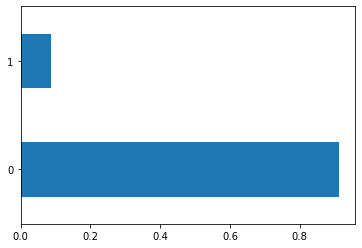

In [119]:
telecom['churn'].value_counts(normalize=True).plot.barh()

# indicate high data imbalance which we had earler also seen

## Outlier Treatment

In [105]:
# List only the numeric columns

numeric_cols = list(telecom.select_dtypes(exclude=['object']).columns)
print(numeric_cols)

['roam_ic_mou_use_phase', 'roam_og_mou_use_phase', 'loc_og_mou_use_phase', 'std_og_mou_use_phase', 'isd_og_mou_use_phase', 'spl_og_mou_use_phase', 'og_others_use_phase', 'total_og_mou_7', 'total_og_mou_use_phase', 'loc_ic_mou_use_phase', 'std_ic_mou_use_phase', 'total_ic_mou_use_phase', 'spl_ic_mou_use_phase', 'isd_ic_mou_use_phase', 'ic_others_use_phase', 'total_rech_count_use_phase', 'total_rech_amt_use_phase', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_use_phase', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_net_mou_intro_phase', 'avg_net_mou_use_phase', 'avg_roam_IC_mou_intro_phase', 'avg_roam_OG_mou_intro_phase', 'avg_loc_og_mou_intro_phase', 'avg_

In [106]:
en = list(enumerate(numeric_cols))
len(en)//4


16

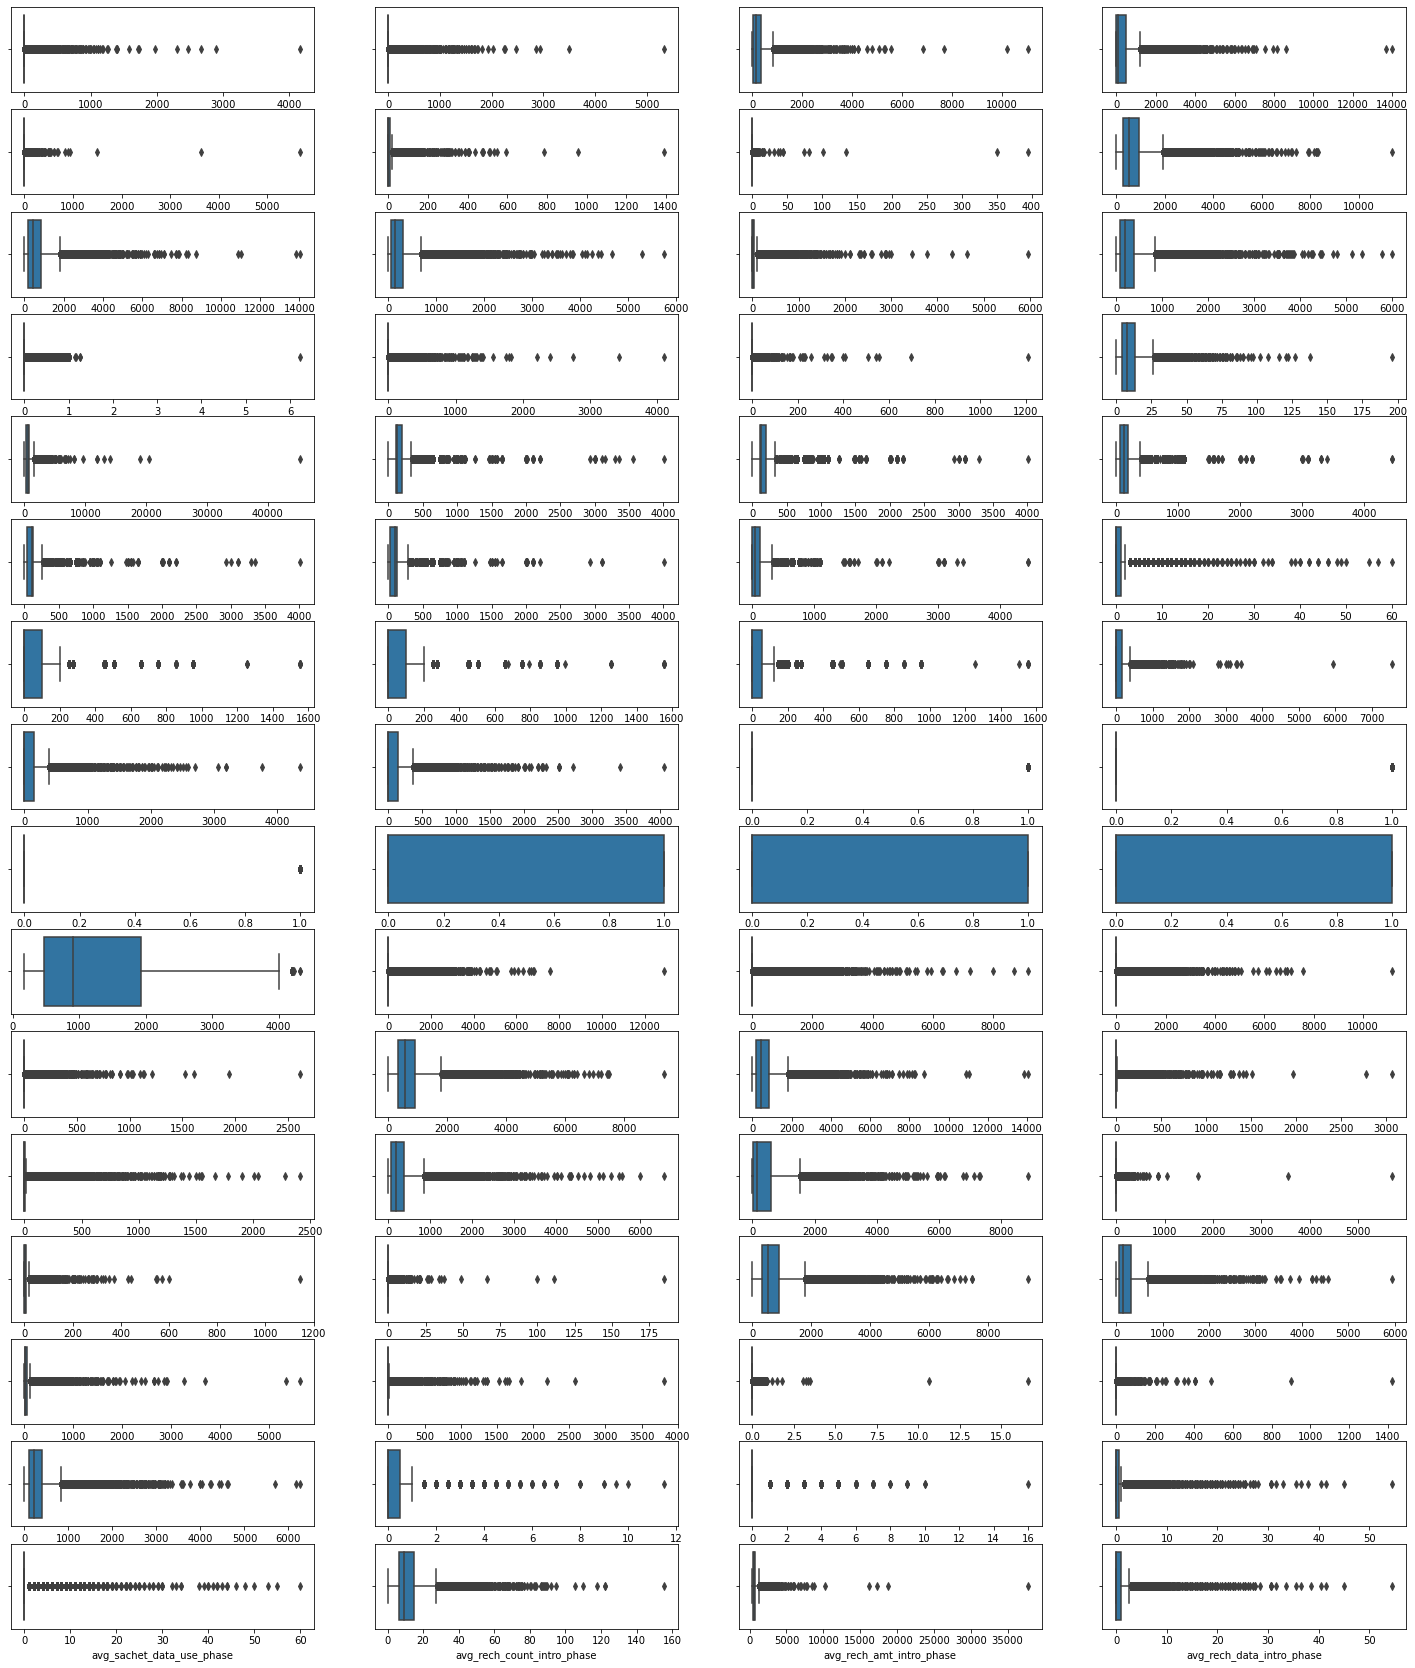

In [112]:
# Plotting boxplot on continuous columns for outlier detection

plt.figure(figsize=(25,60))
for num,col in enumerate(numeric_cols):
    plt.subplot(32,4,en[num][0]+1)
    sns.boxplot(telecom[col])
plt.show()

In [113]:
telecom.describe()

,roam_ic_mou_use_phase,roam_og_mou_use_phase,loc_og_mou_use_phase,std_og_mou_use_phase,isd_og_mou_use_phase,spl_og_mou_use_phase,og_others_use_phase,total_og_mou_7,total_og_mou_use_phase,loc_ic_mou_use_phase,std_ic_mou_use_phase,total_ic_mou_use_phase,spl_ic_mou_use_phase,isd_ic_mou_use_phase,ic_others_use_phase,total_rech_count_use_phase,total_rech_amt_use_phase,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_use_phase,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase
count,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,13.25627,21.469272,261.233938,353.558826,2.029314,6.885193,0.059131,709.124730,623.774684,234.281577,48.170990,295.426531,0.027660,11.700835,1.237756,10.225317,613.638799,171.414048,175.661058,162.869348,104.485655,105.287128,95.653294,1.035287,56.909666,58.679284,55.258072,90.728204,97.545627,89.762766,0.010363,0.009863,0.009297,0.340875,0.345773,0.327946,1264.064776,129.439626,135.127102,121.360548,6.562685,716.127070,642.622103,15.305158,25.386506,282.477239,401.541142,2.129306,6.627776,0.367360,697.911136,244.944158,51.904982,11.592040,0.042265,1.326946,311.193772,0.307621,0.287261,0.687848,0.748026,12.017394,696.664356,0.860235
std,74.55207,106.244774,366.539171,616.219690,44.794926,22.893414,3.320320,685.071178,685.983313,307.043800,140.965196,360.343153,0.116574,74.928607,12.889879,9.478572,601.821630,174.703215,181.545389,172.605809,142.767207,141.148386,145.260363,2.405187,105.811594,108.137996,104.787395,191.190963,198.351762,185.812445,0.101271,0.098824,0.095971,0.474011,0.475628,0.469473,975.263117,390.478591,408.024394,389.726031,48.638658,615.670838,690.378898,67.189720,94.466222,357.919565,574.050121,44.566941,18.332515,1.842523,610.373239,298.513543,134.857133,66.984886,0.152417,13.394444,345.411427,0.627670,0.670722,2.049929,2.325915,8.729543,488.782088,2.139044
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
# Scaling will be required to be done

In [133]:
telecom.head(2)

,roam_ic_mou_use_phase,roam_og_mou_use_phase,loc_og_mou_use_phase,std_og_mou_use_phase,isd_og_mou_use_phase,spl_og_mou_use_phase,og_others_use_phase,total_og_mou_7,total_og_mou_use_phase,loc_ic_mou_use_phase,std_ic_mou_use_phase,total_ic_mou_use_phase,spl_ic_mou_use_phase,isd_ic_mou_use_phase,ic_others_use_phase,total_rech_count_use_phase,total_rech_amt_use_phase,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_use_phase,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase,churn
7,31.64,38.06,255.79,77.84,10.01,6.50,0.0,609.24,350.16,188.04,193.94,428.74,0.0,31.59,15.14,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,566.555,378.20,24.86,18.165,478.035,68.00,0.09,2.25,0.0,548.385,391.555,176.810,8.295,0.105,15.465,592.250,0.0,0,0.0,0,5.0,1185.0,0.0,1
8,0.00,0.00,63.04,98.28,0.00,10.23,0.0,431.66,171.56,15.79,0.75,16.54,0.0,0.00,0.00,14,120,90,154,30,50,0,10,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,0.0,0.0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,470.005,171.56,0.00,0.000,333.135,136.87,0.00,0.00,0.0,470.010,52.630,13.545,0.000,0.000,0.000,66.175,0.5,0,0.5,3,20.0,519.0,0.0,0


### Step 4: Test-Train Split

In [129]:
from sklearn.model_selection import train_test_split

In [134]:
# Putting feature variable to X
X = telecom.drop(['churn'], axis=1)

X.head()

,roam_ic_mou_use_phase,roam_og_mou_use_phase,loc_og_mou_use_phase,std_og_mou_use_phase,isd_og_mou_use_phase,spl_og_mou_use_phase,og_others_use_phase,total_og_mou_7,total_og_mou_use_phase,loc_ic_mou_use_phase,std_ic_mou_use_phase,total_ic_mou_use_phase,spl_ic_mou_use_phase,isd_ic_mou_use_phase,ic_others_use_phase,total_rech_count_use_phase,total_rech_amt_use_phase,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_use_phase,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase
7,31.64,38.06,255.79,77.84,10.01,6.50,0.0,609.24,350.16,188.04,193.94,428.74,0.0,31.59,15.14,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,566.555,378.20,24.860,18.165,478.035,68.000,0.09,2.25,0.000,548.385,391.555,176.810,8.295,0.105,15.465,592.250,0.0,0,0.0,0,5.0,1185.0,0.0
8,0.00,0.00,63.04,98.28,0.00,10.23,0.0,431.66,171.56,15.79,0.75,16.54,0.0,0.00,0.00,14,120,90,154,30,50,0,10,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,0.0,0.0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,470.005,171.56,0.000,0.000,333.135,136.870,0.00,0.00,0.000,470.010,52.630,13.545,0.000,0.000,0.000,66.175,0.5,0,0.5,3,20.0,519.0,0.0
13,72.11,1.44,353.99,655.18,1.29,4.78,0.0,192.41,1015.26,255.26,474.41,1144.53,0.0,393.39,21.44,11,717,110,110,130,110,50,0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,571.370,1016.70,83.885,21.620,129.395,420.355,0.00,0.00,0.000,549.750,120.845,245.950,153.695,0.225,49.860,570.595,0.0,0,0.0,3,5.0,380.0,0.0
16,0.00,0.00,205.93,21.53,0.00,5.91,0.0,286.01,233.38,211.78,82.44,294.46,0.0,0.23,0.00,2,160,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,325.275,233.37,1.415,8.870,265.775,48.990,0.00,1.63,0.000,316.410,253.345,119.860,0.000,0.000,0.000,373.210,0.0,0,0.0,0,8.0,459.0,0.0
17,4.81,13.34,0.00,0.00,0.00,0.00,0.0,0.81,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,110,0,30,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667,0.00,0.00,0.00,0.0,628.415,13.33,2.380,4.230,48.770,574.635,0.00,1.29,0.465,625.170,42.135,4.955,0.000,0.000,0.000,47.095,0.0,0,0.0,0,10.5,408.0,0.0


In [135]:
# Putting response variable to y
y = telecom['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: object

In [136]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_train.head()

,roam_ic_mou_use_phase,roam_og_mou_use_phase,loc_og_mou_use_phase,std_og_mou_use_phase,isd_og_mou_use_phase,spl_og_mou_use_phase,og_others_use_phase,total_og_mou_7,total_og_mou_use_phase,loc_ic_mou_use_phase,std_ic_mou_use_phase,total_ic_mou_use_phase,spl_ic_mou_use_phase,isd_ic_mou_use_phase,ic_others_use_phase,total_rech_count_use_phase,total_rech_amt_use_phase,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_use_phase,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase
4715,-0.173141,-0.209478,-0.672215,0.234851,-0.045443,-0.170889,-0.019525,-0.108047,-0.158790,-0.735412,0.836532,-0.329312,-0.249042,-0.152432,-0.095158,1.539738,-0.293746,-0.797034,-0.575193,-0.648201,-0.719321,-0.603403,-0.580228,-0.421416,-0.537156,-0.383761,-0.529666,-0.488413,-0.405449,-0.485476,-0.103583,-0.100969,-0.097794,-0.721293,1.379101,-0.70005,-0.938635,-0.329669,-0.330304,-0.310692,-0.132291,-0.246715,-0.189267,-0.222334,-0.274602,-0.772522,0.241823,-0.046877,0.692966,-0.181513,-0.216456,-0.748866,0.497735,-0.167969,0.188026,-0.091904,-0.494650,-0.492015,-0.430718,-0.088596,-0.314251,1.084775,-0.520352,-0.39967
15222,-0.173141,-0.209478,0.090058,-0.565942,-0.045443,-0.144825,-0.019525,-0.814449,-0.465665,0.688366,-0.331117,0.449496,-0.249042,-0.008639,-0.095158,-0.758758,-0.279568,-0.349396,0.115114,0.196411,0.030584,0.032728,0.697039,-0.019149,-0.537156,1.273967,1.356275,-0.488413,0.503927,0.574907,-0.103583,-0.100969,-0.097794,-0.721293,1.379101,1.42847,-0.198224,0.104407,-0.168340,-0.185233,0.126594,-0.770429,-0.490211,-0.222334,-0.274602,-0.135403,-0.695997,-0.046877,-0.113039,-0.181513,-0.747976,0.640912,-0.352371,-0.019865,-0.252689,-0.091904,0.405296,0.304576,1.048937,-0.332455,-0.314251,-0.689027,-0.514834,-0.39967
60145,-0.173141,-0.209478,0.620574,-0.565336,-0.028006,-0.298169,-0.019525,-0.110539,-0.184790,-0.044037,-0.333863,1.297310,-0.249042,7.100669,-0.095158,0.494967,0.055400,-0.797034,-0.305542,-0.648201,-0.514801,0.103409,-0.308469,-0.421416,-0.537156,-0.539459,-0.529666,-0.488413,-0.490860,-0.485476,-0.103583,-0.100969,-0.097794,-0.721293,-0.725110,-0.70005,1.036820,-0.329669,-0.330304,-0.310692,-0.132291,-0.465596,-0.212083,-0.222334,-0.274602,0.388207,-0.687181,0.092373,-0.350349,-0.181513,-0.429837,-0.042521,-0.365845,9.604938,-0.252689,-0.091904,1.712314,-0.492015,-0.430718,-0.332455,-0.314251,0.226483,-0.180472,-0.39967
62445,-0.173141,-0.209478,-0.116383,0.558289,-0.045443,-0.298169,-0.019525,0.457614,0.424083,-0.680633,0.044346,-0.596764,-0.249042,-0.152432,-0.095158,0.599444,0.064262,-0.701911,-0.699232,-0.665321,-0.398907,-0.589267,-0.328851,-0.421416,-0.537156,-0.539459,-0.529666,-0.488413,-0.490860,-0.485476,-0.103583,-0.100969,-0.097794,-0.721293,-0.725110,-0.70005,1.375791,-0.329669,-0.330304,-0.310692,-0.132291,0.332501,0.394386,-0.222334,-0.274602,0.506998,0.097488,-0.046877,-0.350349,-0.181513,0.365984,-0.671824,0.129560,-0.108352,-0.252689,-0.091904,-0.559221,-0.492015,-0.430718,-0.332455,-0.314251,0.455361,-0.148470,-0.39967
88349,-0.173141,-0.209478,-0.381388,-0.375532,-0.045443,-0.296866,-0.019525,-0.265035,-0.552953,-0.169073,-0.165388,-0.175919,4.168896,0.16498

### Step 6: Looking at Correlations

In [141]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

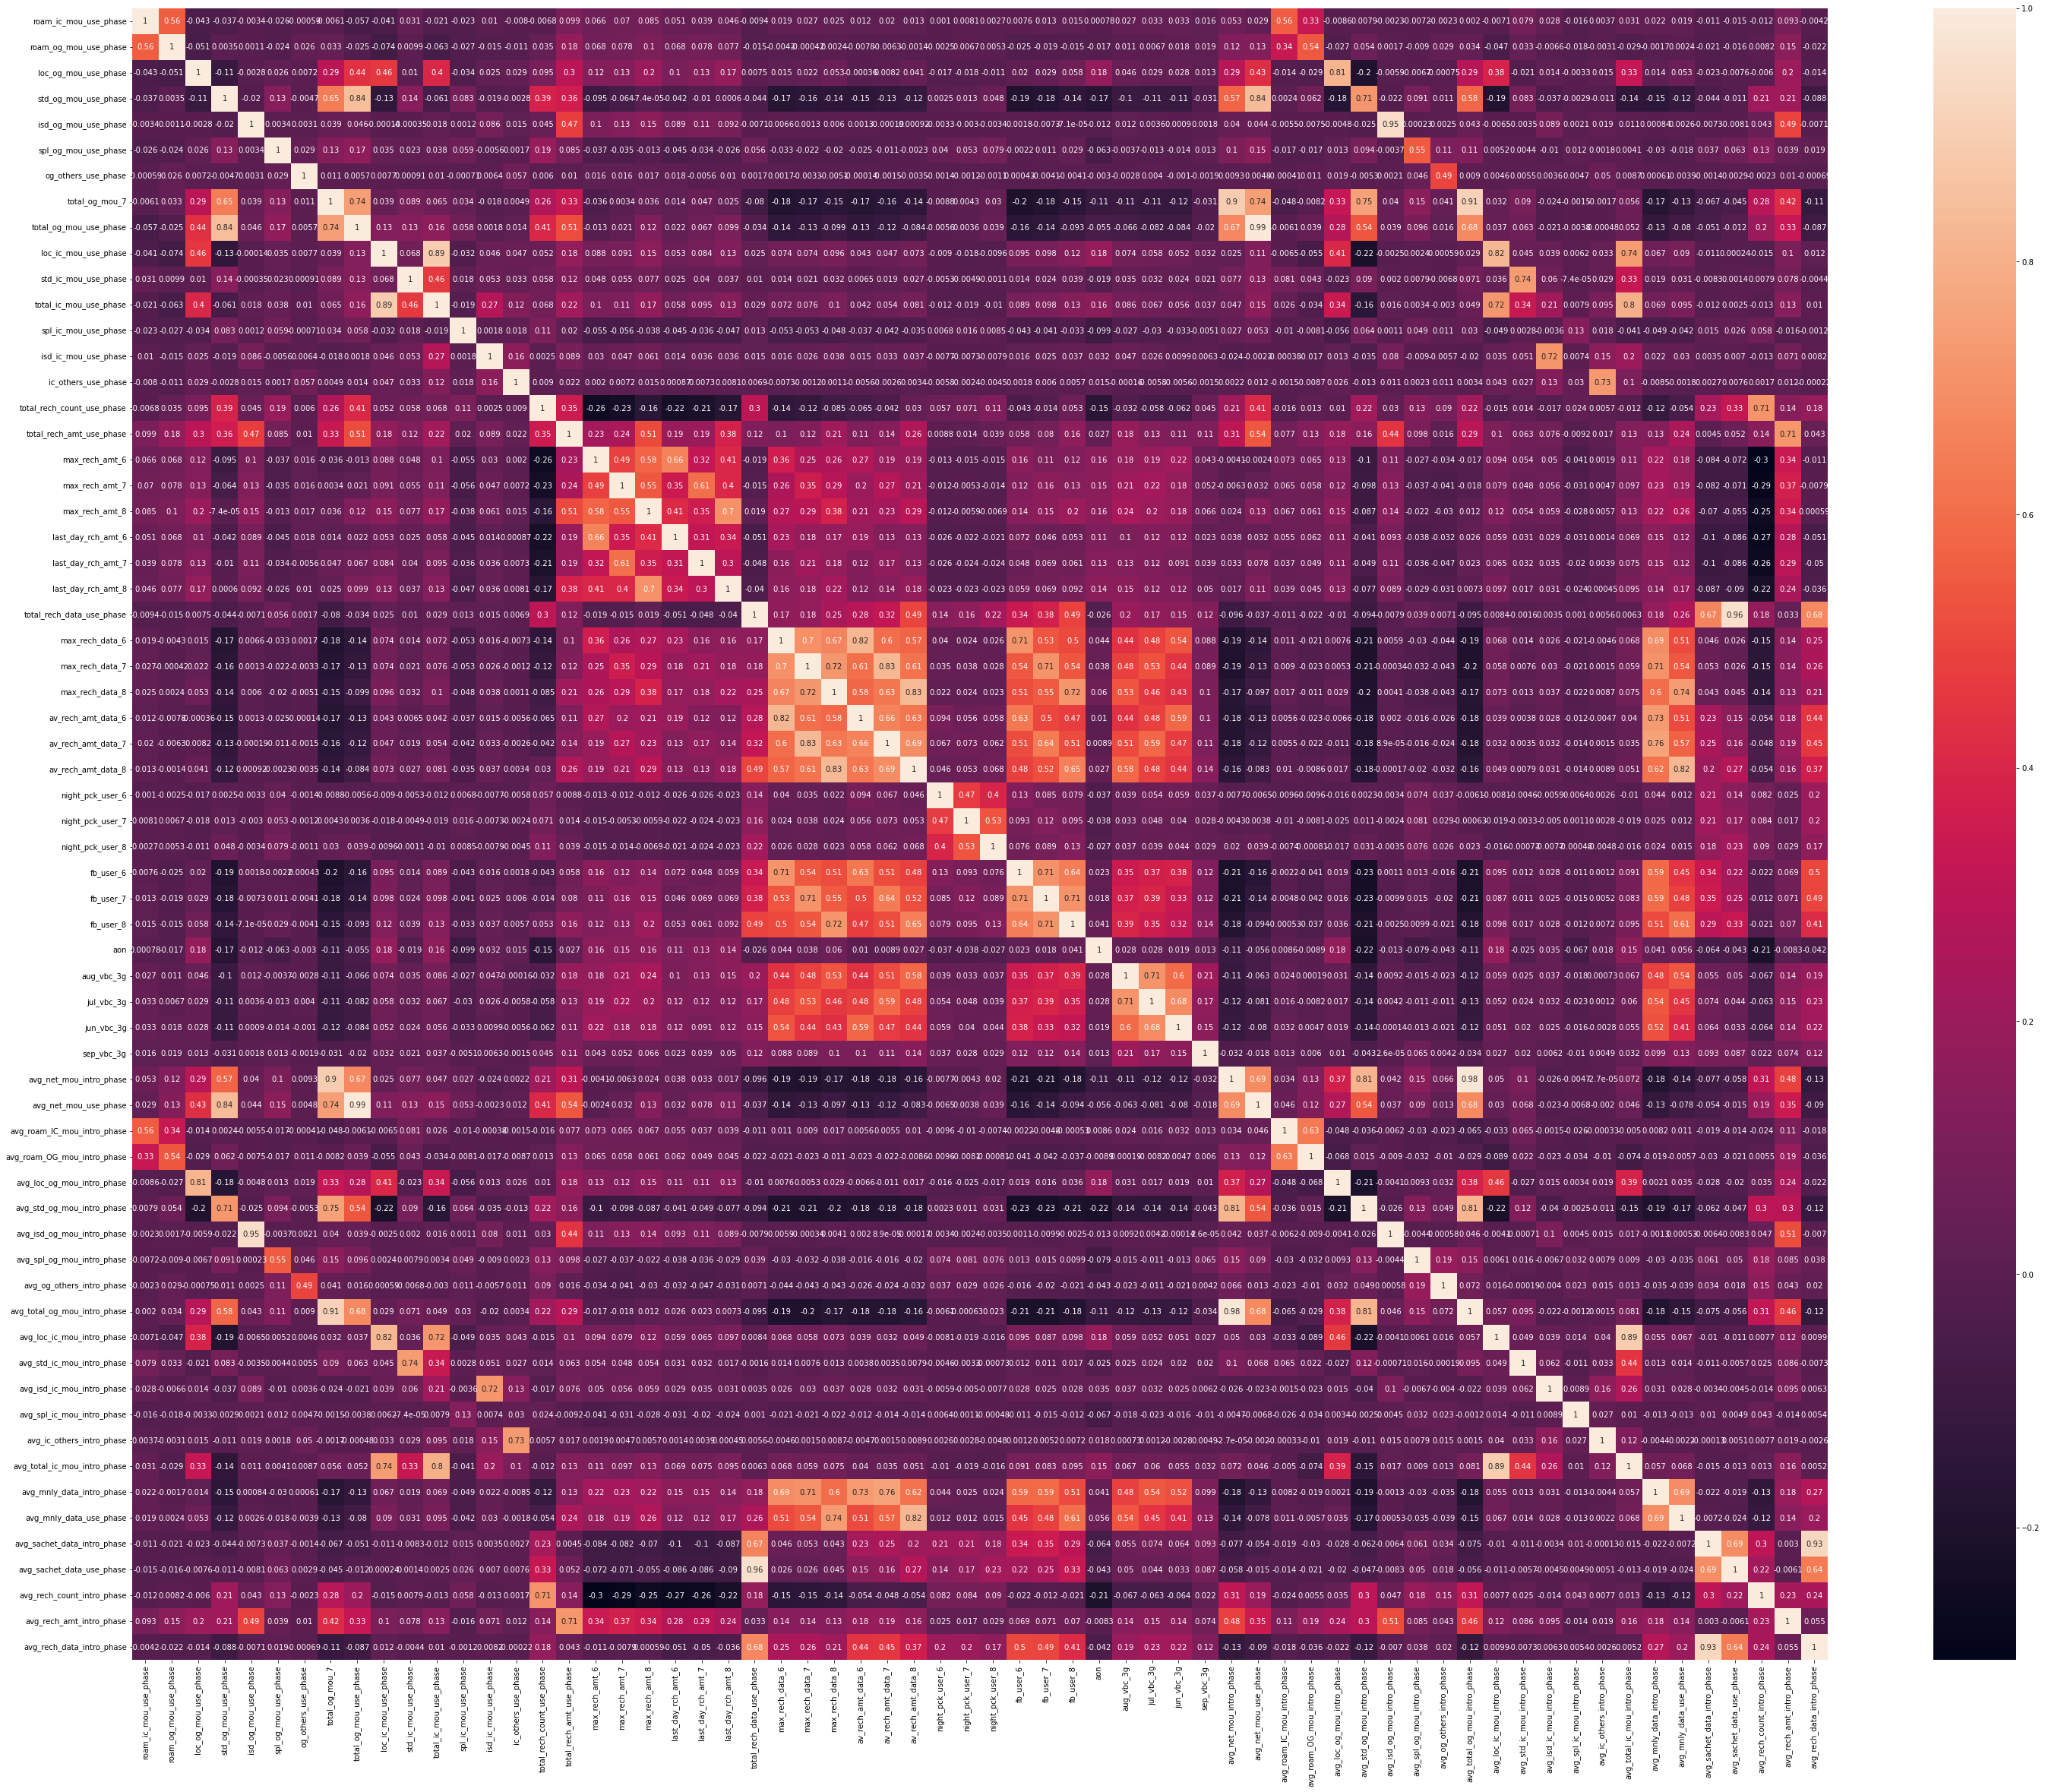

In [145]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))        
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [168]:
corr_df =pd.DataFrame(telecom.corr())


In [ ]:
## Need to check for code to filter out col wiht value> 0.3

In [166]:
df_high_corr = corr_df[corr_df > 0.5]

In [167]:
df_high_corr

,roam_ic_mou_use_phase,roam_og_mou_use_phase,loc_og_mou_use_phase,std_og_mou_use_phase,isd_og_mou_use_phase,spl_og_mou_use_phase,og_others_use_phase,total_og_mou_7,total_og_mou_use_phase,loc_ic_mou_use_phase,std_ic_mou_use_phase,total_ic_mou_use_phase,spl_ic_mou_use_phase,isd_ic_mou_use_phase,ic_others_use_phase,total_rech_count_use_phase,total_rech_amt_use_phase,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_use_phase,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_net_mou_intro_phase,avg_net_mou_use_phase,avg_roam_IC_mou_intro_phase,avg_roam_OG_mou_intro_phase,avg_loc_og_mou_intro_phase,avg_std_og_mou_intro_phase,avg_isd_og_mou_intro_phase,avg_spl_og_mou_intro_phase,avg_og_others_intro_phase,avg_total_og_mou_intro_phase,avg_loc_ic_mou_intro_phase,avg_std_ic_mou_intro_phase,avg_isd_ic_mou_intro_phase,avg_spl_ic_mou_intro_phase,avg_ic_others_intro_phase,avg_total_ic_mou_intro_phase,avg_mnly_data_intro_phase,avg_mnly_data_use_phase,avg_sachet_data_intro_phase,avg_sachet_data_use_phase,avg_rech_count_intro_phase,avg_rech_amt_intro_phase,avg_rech_data_intro_phase
roam_ic_mou_use_phase,1.000000,0.560314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roam_og_mou_use_phase,0.560314,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_mou_use_phase,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_mou_use_phase,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.645124,0.843398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573936,0.837172,NaN,NaN,NaN,0.714750,NaN,NaN,NaN,0.577762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isd_og_mou_use_phase,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spl_og_mou_use_phase,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
og_others_use_phase,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_og_mou_7,NaN,NaN,NaN,0.645124,NaN,NaN,NaN,1.000000,0.742520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895276,0.741300,NaN,NaN,NaN,0.752134,NaN,NaN,NaN,0.910843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_og_mou_use_phase,NaN,NaN,NaN,0.843398,NaN,NaN,NaN,0.742520,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674596,0.987966,NaN,NaN,NaN,0.539020,NaN,NaN,NaN,0.680201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic

In [ ]:
# we will do the feature selection using RFE rather than manually

### CLass Imbalance

In [169]:
### Checking the Churn Rate
churn = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

8.64016527273333

We have to use SMOTE for balancing the data

In [170]:
# Handling  Class imbalance
# import library



# Installed the module named imblearn using anaconda command prompt.
# conda install -c conda-forge imbalanced-learn

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [173]:
import statsmodels.api as sm

In [188]:
np.asarray(y_train).dtype

dtype('O')

In [189]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Step 8: Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

##### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [ ]:
col = col.drop('PhoneService', 1)
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

The accuracy is still practically the same.

##### Let's now check the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [ ]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

In [ ]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
?precision_score

In [ ]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [ ]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Churn, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

## Using Decision Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [ ]:
dt_base.fit(X_train, y_train)

In [ ]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_pred))

#### Plot the ROC curve

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
%%time
rf.fit(X_train, y_train)

In [ ]:
rf.oob_score_

In [ ]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
## test ##

In [ ]:
## Test by Vaibhav##